# Playing with NumPy

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import mplcyberpunk
%config InlineBackend.figure_format = 'svg'

## Creating Arrays

In [2]:
a1 = np.array([3, 5, 7, 3])
a2 = np.zeros(10)
a3 = np.ones(10)
a4 = np.random.random(10) # uniformly random numbers
a5 = np.random.randn(10)  # gaussian random numbers (rand-n as in normally distributed)
a6 = np.linspace(0, 10, 100) # create a linspace of equally distributed points over a range, specifying the extremes and N points
a7 = np.arange(0, 10, 0.02) # analogous to linspace but you specify the spacing, rather than the number of points

## Array Operations

In [3]:
2 * a1 # scaling
1/a1   # notice how it performs the operation elementwise
1/a1 + a1 + 2 # numpy knows that this is equivalent to summing a vector of 2s of the same size
a1 > 4 # booleans work too
a1[a1 > 4] # they can be very useful as you can see

array([5, 7])

This is extremely useful and intuitive if you think about arrays as vectors and matrices. Remember that these are numpy arrays, not core python lists. If you're used to working with arrays as vectors (from Octave, Matlab, R, etc.) then this will be very familiar, but it is a specific feature of numpy and not arrays in general.

(array([2., 0., 0., 0., 1., 2., 0., 1., 1., 3.]),
 array([0.0056463 , 0.0923034 , 0.1789605 , 0.2656176 , 0.35227471,
        0.43893181, 0.52558891, 0.61224601, 0.69890311, 0.78556022,
        0.87221732]),
 <BarContainer object of 10 artists>)

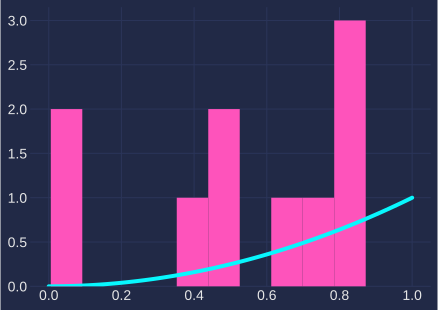

In [25]:
# Let's plot something basic using matplotlib
x = np.linspace(0, 1, 100)
plt.style.use('cyberpunk')
#mplcyberpunk.add_gradient_fill()
plt.plot(x, x**2)

plt.hist(a4)

Functions can be **chained** together, as you would normally expect, so you can do things like:

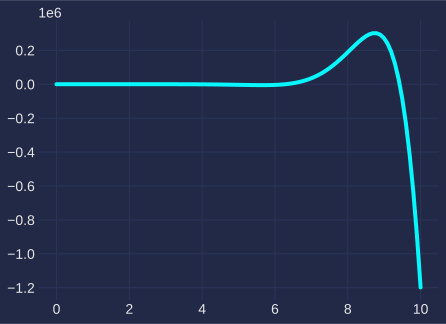

In [27]:
def f(x):
    return x**2 * np.sin(x) / np.exp(-x)

x = np.linspace(0, 10, 100)
y = f(x)
plt.plot(x, y)

## Array Indexing and Slicing

If you're coming from Octave or Matlab, things are very similar, but remember that indexing in python starts at 0, not 1. So the first element of an array is `a[0]`, not `a[1]`. Which is arguably better, but it's a difference you should be aware of.

In [33]:
a1 = np.array([2, 4, 6, 10, 17])
a1[0] # first element
a1[-1] # you can start indexing from the end using negative indices, which can be very useful
a1[2:] # the colon notation works similarly to octave or matlab and can be used to access specific ranges of indices
a1[:-2] # very useful notation as you can see
a1[a1 < 9] # booleans are useful as mentioned earlier

array([2, 4, 6])

**NumPy** arrays don't necessarily deal with numerical data only. You can have arrays of strings, or arrays of booleans, or arrays of arrays, or arrays of dictionaries, or arrays of functions, or arrays of classes, or arrays of modules, or arrays of anything. The only restriction is that all the elements of an array must be of the same type.

In [41]:
names = np.array(['Walter', 'Jesse', 'Saul', 'Hank', 'Huel', 'Hector', 'Gustavo'])
# Let's say I want to extract only the names that start with H
start_with_h = np.vectorize(lambda L: L[0])(names) == 'H' 
# Notice how lambda is just declaring a function that takes an array and returns its first element. The vectorize function from
# numpy easily iterates any operation over any vector. Using the == 'H' will have start_with_h return an array of booleans. 

names[start_with_h] # Then the original array can be filtered using this set of boolean values.

array(['Hank', 'Huel', 'Hector'], dtype='<U7')

Let's see another example of using booleans this way, as a tribute to stuff I learnt from *SICP*

In [45]:
a1 = np.array([2, 3, 4, 13, 8])
def even_predicate(arr):
    return arr%2 == 0

even_predicate(a1)

# And again we can use this array of booleans to filter the original array
a1[even_predicate(a1)]

array([2, 4, 8])

# Calculus and Statistics

We've covered the basics of **NumPy**, but its capabilities go far beyond that. NumPy is a very powerful library for doing numerical calculations, and it is the foundation of many other libraries that are used for *scientific computing*. In this section we'll look at some of the more advanced features of NumPy, and see how we can use it to do some basic calculus and statistics.

In [48]:
a1 = 2 * np.random.randn(10000) + 10

Let's see how we can calculate the *mean*, the *standard deviation* and the *percentiles* of any array of numbers.

In [49]:
np.mean(a1)

9.999311297078672

In [50]:
np.std(a1)

2.009060817890729

In [51]:
np.percentile(a1, 70) 

11.052726250885385

## Integrals and Derivatives

In [58]:
x = np.linspace(1, 10, 10000)
y = 1 / x**2 * np.cos(x)
ydot = np.gradient(y, x)
Y = np.cumsum(y) * (x[1] - x[0]) # integrating using the cumulative sum method and multiplying by an appropriate dx

In [63]:
# To better visualize what a cumulative sum is, it's easy to see it's effect on a small discrete dataset
np.cumsum(np.array([1, 2, 3, 4, 5]))

array([ 1,  3,  6, 10, 15])

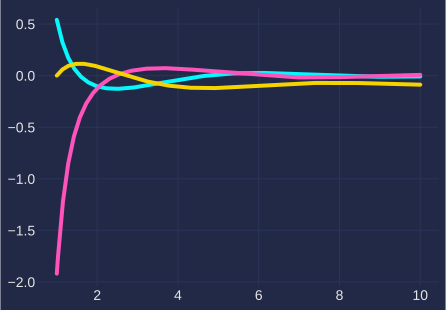

In [64]:
plt.plot(x, y)
plt.plot(x, ydot)
plt.plot(x, Y)

## Exercises

### Question 1: 

Let $y = e^{-x/10} sin(x)$. Consider 10000 x intervals in the range $[0, 10]$

1. Plot $y$ as a function of $x$ in that range.
2. Compute the mean and standard deviation of $y$ for values in $[4, 7]$.
3. For values in $[4, 7]$, find the value $y_m$ such that 80% of the values are less than $y_m$.
4. Plot $\dot{y}$ as a function of $x$.
5. Find the locations where $\dot{y}$ is zero.



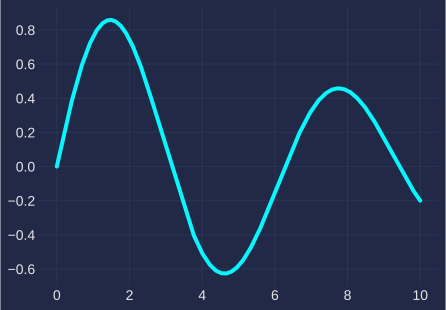

In [109]:
# 1
N = 10000
x = np.linspace(0, 10, N + 1)
def f(x):
    return np.exp(- x/10) * np.sin(x)
y = f(x)
plt.plot(x, y)

In [111]:
# 2
cond = (x >= 4) & (x <= 7)
x_space = x[cond] 
y1 = f(x_space)
print(np.mean(y1))
print(np.std(y1)) 

-0.2956023068963138
0.31448753875085117


In [112]:
# 3 
np.percentile(y1, 80)

0.06145551274590662

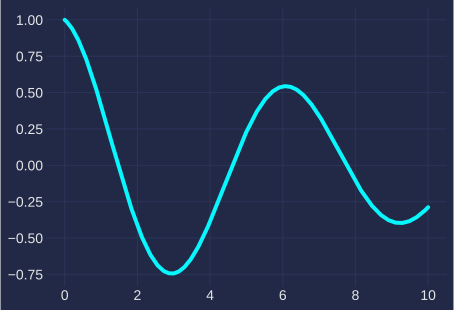

In [117]:
ydot = np.gradient(y, x)
plt.plot(x, ydot)
#plt.plot(x, y)

In [120]:
# 5
cond = ydot[1:] * ydot[:-1] < 0
x[1:][cond]

array([1.472, 4.613, 7.755])

### Question 2:

Sum together every number from 0 to 10000 except for those that can be divided by 4 or 7. Do this in one line of code.

In [121]:
# I know that divisibility of a number by another can be checked with the modulo being equal to 0



### Question 3:

Consider the flower petal $r(\theta) = 1 + \frac{3}{4} sin(3\theta)$ for $\theta \in [0, 2\pi]$.

1. Make a plot of the flower (find x and y points).
2. Compute the area using the calculus formula $ A = \int_0^{2\pi} \frac{1}{2} r^2 \, d\theta$.
3. Compute the arc length using the calculus formula $ L = \int_0^{2\pi} \sqrt{r^2 + \dot{r}^2} \, d\theta$.